### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
# 선형회귀 (Linear Regression)

- 회귀는 데이터가 주어졌을 때, **실수값**인 타겟값(또는 목표값)을 예측하는 방법이다.

나이 | 성별 | 키  | 몸무계
-----|------|-----|-------
35   | 남   | 175 | 67
...  | ...  | ... | ...
27   | 여   | 163 | 52

- 위와 같은 데이터가 주어졌을 때, 키(데이터)에 따른 몸무계(타겟값)를 예측하는 것은 회귀 문제이다.
- 회귀 중에서도, 직선 또는 곧은 평면(굽은 평면이 아님)으로 타겟값을 예측하는 것을 **선형회귀** 라고 한다. 아래 그림에서 직선으로 예측한 경우에 해당한다.

<img src="ch02_02.png" />
<p style="text-align: center;">(출처 : wikipedia - overfitting)</p>

- 속성이 하나 뿐일 때는 위와 같이 직선으로 표현할 수 있지만 속성이 2개일 때는 곧은 평면, 3개 이상에서는 초평면으로 표현한다.

<img src="ch02_03.jpg" />
<p style="text-align: center;">(출처 : https://www.dataquest.io/blog/statistical-learning-for-predictive-modeling-r/)</p>

- 선형회귀에서 굳이 타겟값을 별도로 구분했지만, 다르게 표현하면 타겟값을 포함한 모든 속성의 상관관계를 평면으로 표현한 것으로 이해할 수 있다.
- 아래에서 Iris 데이터를 가지고 선형회귀를 적용해 보겠다.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data[:,[0]]
y = iris.data[:,3]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.score(X_test, y_test)

0.6806440382291595

In [20]:
pred_y = model.predict(X_test)
display(pred_y[:10], y_test[:10])

array([0.93393159, 1.77215001, 1.69594834, 0.6291249 , 1.31493997,
       1.01013327, 1.31493997, 2.22936006, 0.6291249 , 0.24811652])

array([1. , 1.3, 2. , 0.4, 1.6, 2. , 1.6, 1.6, 1.1, 0.2])

In [21]:
model.coef_ # u = ax + by + cz + d => (a,b,c) 와 비슷한 개념

array([0.76201675])

In [22]:
model.intercept_ # u = ax + by + cz + d => d 와 비슷한 개념

-3.2571605082934725

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CAB09D0>,
      dtype=object)

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


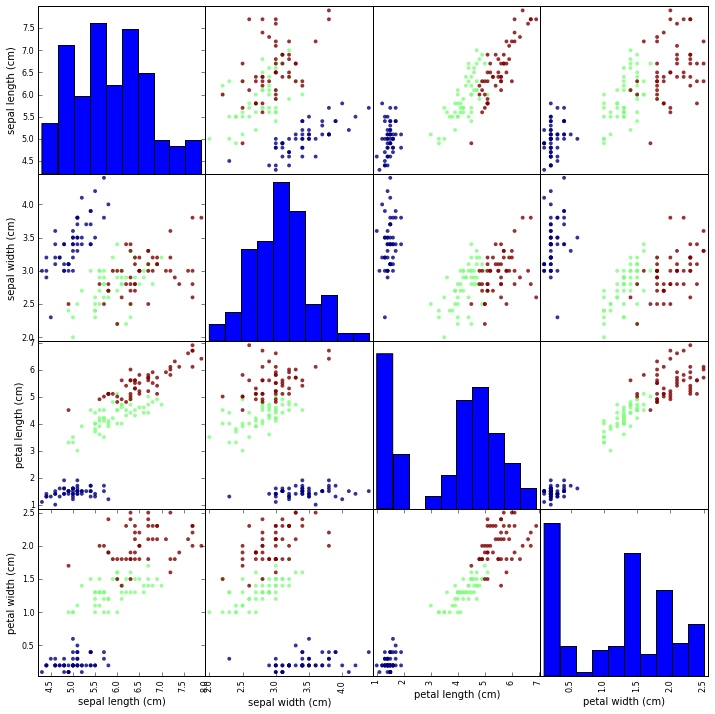

In [57]:
import pandas as pd

iris_df = pd.DataFrame(X, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=y, s=60, alpha=0.8, figsize=[12,12])

- 위의 산점도에서 각 속성들 간의 상관관계를 짐작해 볼 수 있다.
- 위의 그림은 pandas 를 이용했지만 numpy 로 직접 그림을 그려보자.

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


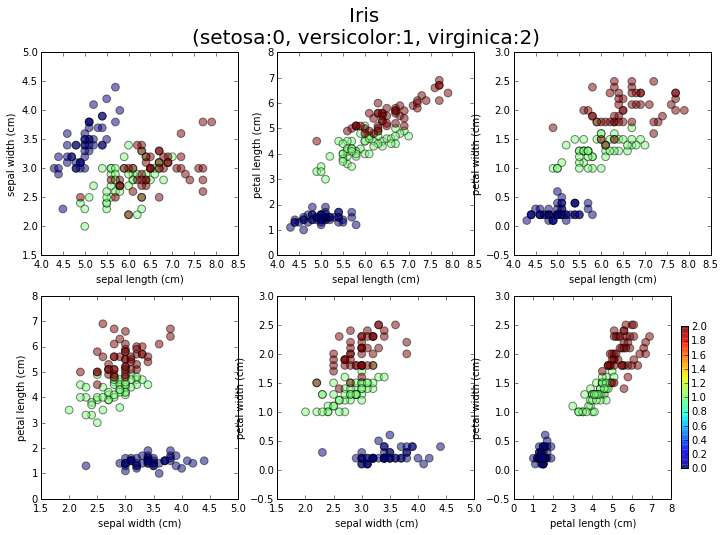

In [58]:
fig=plt.figure(figsize=[12,8])
fig.suptitle('Iris\n(setosa:0, versicolor:1, virginica:2)',fontsize=20)
count=0

for i in range(3):
    for j in range(i+1,4):
        count+=1
        plt.subplot(2,3,count)
        plt.scatter(iris.data[:,i],iris.data[:,j],c=iris.target,s=60,alpha=0.5)
        plt.xlabel(iris.feature_names[i])
        plt.ylabel(iris.feature_names[j])
        
plt.colorbar(shrink=0.7)

- 위의 산점도에서 가장 크게 선형관계를 가지는 것은 petal length 와 petal width 이다.
- 아래에서 이 두 속성간의 상관관계를 직선으로 표현해 보자.
>참고 : 이 경우 petal length 가 데이터가 되고, petal width 가 타겟값이 된다. 반대로 적용해도 결과는 같다.

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

iris.data[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [3]:
iris.data[:,0].shape

(150,)

In [6]:
iris.data[:, 0].reshape(-1,1)

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [9]:
iris.data[:, [2,3]] # [:,2:4]
iris.data[:, [0]]

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ],
       [7. ],
       [6.4],
       [6.9],
       [5.5],
       [6.5],
       [5.7],
       [6.3],
       [4.9],
       [6.6],
       [5.2],
       [5. ],
       [5.9],
       [6. ],
       [6.1],
       [5.6],
       [6.7],
       [5.6],
       [5.8],
       [6.2],
       [5.6],
       [5.9],
      

In [17]:
col1 = 2
col2 = 3

X = iris.data[:, [col1]] # X = iris.data[:,0].reshape(150,1)
y = iris.data[:, col2]

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

score = model.score(X, y) # R^2 값
w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('score = %.2f' % score) # print('score =', score)
print('w =',w)
print('b =',b)

score = 0.9269012279220037
w = 0.4164191322854012
b = -0.3665140452167275


In [26]:
model.coef_ # 결과는 Numpy 어레이이다

array([0.41641913])

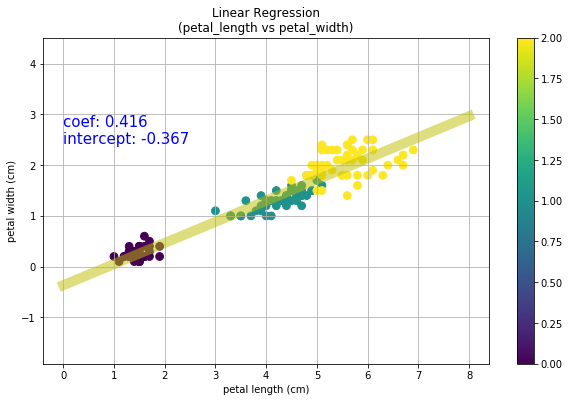

In [27]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,6))
plt.title('Linear Regression\n(petal_length vs petal_width)')

plt.scatter(X,y,c=iris.target,s=60)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.colorbar()

plt.plot([0,8],[0*w+b,8*w+b],'y',lw=10,alpha=0.5)
plt.text(0,3,'coef: %.3f\nintercept: %.3f' % (w,b), va='top', fontsize=15,color='b')
plt.axis('equal')
plt.grid()

In [28]:
result = model.predict([[4], [5], [6]])
display(result, 4*w+b)

array([1.29916248, 1.71558162, 2.13200075])

1.2991624839248772

In [31]:
model.predict(X[:10])

array([0.21647274, 0.21647274, 0.17483083, 0.25811465, 0.21647274,
       0.34139848, 0.21647274, 0.25811465, 0.21647274, 0.25811465])

In [32]:
y[:10]

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1])

In [29]:
score = model.score(X, y)
display(score) # R^2 값

0.9269012279220037

- 회귀에서의 평가 점수는 $R^2$ 이라는 것을 사용한다.<br>

> $R^2 = 1 - \frac{\sum (y-\hat{y})^2} {\sum (y-\bar{y})^2} $  ($\bar{y}$ 는 평균, $\hat{y}$ 는 예측값)<br>
> $R^2$ 값이 1 이면 완벽하게 예측했다는 의미이고, 0 이면 누구나 하듯이 평균값으로 에측했다는 의미이다. 그리고 음수이면 평균값 예측보다도 못하다는 의미가 된다.

- 앞에서 model.fit() 을 하고 나면, model.coef\_ 으로 기울기 값을 model.intercept\_ 로 y절편 값을 얻을 수 있다.
- 그런데 앞의 예제는 앞에서 중요하게 강조했던 학습세트와 테스트세트로 분리하지 않았다. 그냥 전체 데이터를 사용하여 두 속성의 상관관계 만을 알고 싶었기 때문이다.
- 하지만 제대로 머신러닝 과정을 밟기 위해 아래에서 학습세트와 테스트세트로 분리하여 적용해 보자. 이렇게 하면 여러가지 예측모델 중에서 어떤 예측모델이 더 나은지 판단할 수 있게 된다.

In [41]:
from sklearn.model_selection import train_test_split

X = iris.data[:,2].reshape(-1,1) # reshape() 함수에 주의
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_[0] # 기울기
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.41653550431468617
b = -0.35648649616058026


In [42]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.919508'

'테스트세트 점수: 0.948559'

- 결과에서 보듯이 테스트세트에 대한 $R^2$ 값이 학습세트에 대한 값 보다 못한 결과를 얻었다.
- 이것은 당연한데, 학습에 사용하지 않은 데이터로 테스트를 했기 때문이다.

- 이제 다른 방법으로 학습 결과를 평가해 보자.
- RMSE(root-mean-square error) = $\sqrt{\frac{(y-\hat{y})^2} {N} }$ , (RMSE 는 값이 작을 수록 결과가 좋은 것이다.)
- 선형회귀의 수학적 원리는 RMSE 를 최소화 하는 초평면을 찾는 것이다.

In [46]:
pred_y = model.predict(X_test)
pred_y

array([1.97611233, 1.39296262, 1.18469487, 1.30965552, 1.39296262,
       0.22666321, 1.51792327, 1.51792327, 1.60123037, 0.26831676,
       0.30997031, 0.30997031, 1.26800197, 1.47626972, 1.60123037,
       0.43493096, 0.26831676, 0.18500966, 0.43493096, 0.18500966,
       0.26831676, 0.26831676, 2.18438008, 0.18500966, 1.55957682,
       1.72619103, 0.35162386, 1.43461617, 0.26831676, 1.68453747,
       2.18438008, 2.14272653, 1.26800197, 1.47626972, 0.35162386,
       1.68453747, 1.35130907, 1.51792327])

In [47]:
y_test

array([2.2, 1.3, 1. , 1.3, 1.2, 0.2, 1.5, 1.5, 1.4, 0.2, 0.4, 0.6, 1.4,
       1.3, 1.5, 0.2, 0.3, 0.3, 0.4, 0.3, 0.1, 0.1, 2.3, 0.2, 1.5, 1.5,
       0.4, 1.3, 0.1, 1.5, 1.9, 2.5, 1.2, 1.4, 0.3, 1.8, 1.3, 1.3])

In [51]:
import numpy as np

MSE = ((y_test - pred_y)**2).sum()/len(y_test)
RMSE = np.sqrt(MSE)
RMSE

0.1542757393842095

In [53]:
MAE = np.abs(y_test - pred_y).sum()/len(y_test)
MAE

0.1281159394427908

- 이제 타겟값인 petal_width 를 제외한 나머지 세가지 속성을 모두 사용하여 선형회귀를 적용해 보자.
- 이럴 경우, 4차원 상에 3차원 초평면으로 예측하기 때문에 그림으로 결과를 표현하기는 쉽지 않다.

In [35]:
X = iris.data[:,:3]
y = iris.data[:,3]

X_train,X_test,y_train,y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

w = model.coef_ # 기울기 (데이터의 속성이 3개이므로 값이 3개임)
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = [-0.26011372  0.26372225  0.54687421]
b = -0.1502414561082135


In [36]:
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display('학습세트 점수: %f' % score1, '테스트세트 점수: %f' % score2) # R^2 값

'학습세트 점수: 0.942630'

'테스트세트 점수: 0.919475'

- 속성이 3개이므로 w 의 값은 3개이다.
> $pred\_y = w_1 \cdot x_1 + w_2 \cdot x_2 + w_3 \cdot x_3 + b$

- train_test_split() 함수를 호출할 때 마다 훈련세트/테스트세트 가 새롭게 구성되므로 score 가 달라질 수 있고 학습 보다 테스트 시 더 score 가 높은 경우도 있다.
- 다양한 선형회귀 모델은 다음 URL 을 참고하자. (http://scikit-learn.org/stable/modules/linear_model.html)
- 선형회귀의 변종인 릿지회귀와 라쏘회귀는 뒤에서 다룬다.
- 2차곡선, 3차곡선 과 같이 다항식을 적용한 다항회귀도 있다. (위 URL의 1.1.16 참고)

In [38]:
x = [[1,2,3], [2,2,4]]
model.predict(x)

array([1.75771196, 2.04447245])

In [39]:
# [1,2,3] 샘플에 대한 예측값 직접 계산
model.coef_[0]*1 + model.coef_[1]*2 + model.coef_[2]*3 + model.intercept_

1.7577119570480175

- 선형회귀에서 사용하는 선형 알고리즘은 다른 많은 머신러닝 알고리즘의 기반이 된다.
- 특히 신경망의 핵심 알고리즘은 선형회귀에서 나온 것이며, 가장 간단한 신경망은 곧 선형회귀와 같다.

## 와인데이터 회귀 적용

In [54]:
wine = np.loadtxt('winequality-red.csv', skiprows=1, delimiter=';')

In [62]:
col1 = 0
col2 = 2

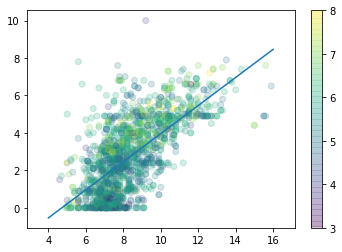

In [73]:
plt.scatter(wine[:,col1], wine[:,col2]*10, c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.axis('equal')
plt.plot([4,16],[4*0.75-3.54, 16*0.75-3.54])

In [75]:
X = wine[:,[0]]
y = wine[:,2]

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0] # 기울기 (데이터의 속성이 3개이므로 값이 3개임)
b = model.intercept_ # y 절편

print('w =',w)
print('b =',b)

w = 0.07515298937155657
b = -0.3542700018191083


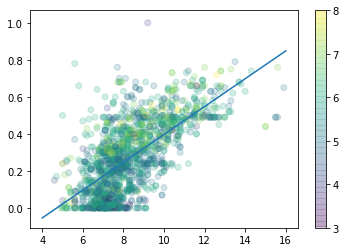

In [76]:
plt.scatter(wine[:,0], wine[:,2], c=wine[:,-1], alpha=0.2)
plt.colorbar()
plt.plot([4,16],[4*w+b, 16*w+b])